In [1]:
%cd C:\Users\debie\Documents\kaggle\Disaster Tweets

C:\Users\debie\Documents\kaggle\Disaster Tweets


# Natural Language Processing with Disaster Tweets

In this project, we'll work on a dataset which contains more than 7000 tweets. Each of these tweets, are classified in the dataset to indicate if it is about a disaster (flood, forest fire, earthquake, ...) or not. 
The aim is to build a machine learning model that predicts which tweets are about real disasters and which one’s aren’t.

This dataset is taken from a "competition" taking place on kaggle website (https://www.kaggle.com/competitions/nlp-getting-started/). It is divided into 2 subsets, one training set and one testing set. The training set (train) has a column indicating if yes or no the tweet is about a disaster. The testing set (holdout) doesn't have this column. Indeed, as it is a "competition" (even if it is just for learning how to perform natural language processing), each participant needs to submit the predictions for the tweets in the testing set, and then kaggle will note the accuracy of the submission.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('train.csv')
holdout = pd.read_csv('test.csv')

In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


The target column display for each row either a 0 or a 1. If the value is 0 it means that the tweet is not about a disaster, if it is a 1 it means that this is about a disaster.

Excluding the id and the target columns, there are 3 columns that can be used to train our algorithm: the keyword, location and text columns. The location column has too many missing values, so we won't use it.

We want to investigate the impact of the keywords column on the target column.


In [6]:
key = list(set(list(train['keyword'])))

In [7]:
key

[nan,
 'quarantined',
 'hijacker',
 'casualties',
 'catastrophe',
 'body%20bagging',
 'curfew',
 'evacuate',
 'blazing',
 'debris',
 'disaster',
 'fatal',
 'rainstorm',
 'destroyed',
 'rescued',
 'survivors',
 'threat',
 'deluge',
 'wildfire',
 'obliteration',
 'hostages',
 'screamed',
 'cliff%20fall',
 'burning%20buildings',
 'chemical%20emergency',
 'siren',
 'inundated',
 'bioterrorism',
 'bomb',
 'wrecked',
 'eyewitness',
 'bombed',
 'injured',
 'survived',
 'explosion',
 'danger',
 'demolish',
 'forest%20fires',
 'injury',
 'arsonist',
 'suicide%20bombing',
 'collision',
 'demolition',
 'annihilated',
 'derailment',
 'rescuers',
 'dust%20storm',
 'crashed',
 'earthquake',
 'attacked',
 'lightning',
 'crash',
 'destruction',
 'hazardous',
 'exploded',
 'storm',
 'whirlwind',
 'outbreak',
 'devastation',
 'epicentre',
 'demolished',
 'terrorist',
 'tornado',
 'wounds',
 'derailed',
 'fatalities',
 'meltdown',
 'nuclear%20disaster',
 'sirens',
 'hurricane',
 'flooding',
 'drown',
 'm

The keyword column is filled with disaster-related words from the tweet. In this dataset, approximately 99% of the rows have their keyword column filled. This column doesn't add any valuable information about the tweet, let's ignore it.

In [8]:
train_bis = train.copy()[['text', 'target']]

In [9]:
train_bis['text'] = train_bis['text'].str.replace('\W', ' ')
train_bis['text'] = train_bis['text'].str.replace('\d', ' ')
train_bis['text'] = train_bis['text'].str.lower()

C:\Users\debie\AppData\Local\Temp/ipykernel_21548/110132716.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_bis['text'] = train_bis['text'].str.replace('\W', ' ')
C:\Users\debie\AppData\Local\Temp/ipykernel_21548/110132716.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_bis['text'] = train_bis['text'].str.replace('\d', ' ')


In [10]:
train_bis.rename(mapper = {'target' : 'target_', 'text' : 'text_'}, axis = 1, inplace = True)
train_bis.head()

,text_,target_
0,our deeds are the reason of this earthquake m...,1
1,forest fire near la ronge sask canada,1
2,all residents asked to shelter in place are ...,1
3,people receive wildfires evacuation or...,1
4,just got sent this photo from ruby alaska as ...,1


Now we can focus on how to process the text column. We will transform the string in this column into a list containing all the words of the original text. Then, for each unique word found in all the dataset, a column will be created, and if this word is in a tweet the value is set to 1 (0 if it is not).

We renamed the "target" and "text" column into "target_" and "text_" beacause the words "target" and "text" are appearing in the tweets and we don't want to create 2 columns with the same name.


In [11]:
train_bis['text_'] = train_bis['text_'].str.split()
vocabulary = []
for words in train_bis['text_']:
    for word in words:
        vocabulary.append(word)
        
vocabulary = list(set(vocabulary))

In [12]:
len(vocabulary)

22261

In [13]:
word_counts_per_tweet = {unique_word: [0] * len(train_bis['text_']) for unique_word in vocabulary}

for index, tweet in enumerate(train_bis['text_']):
    for word in tweet:
        word_counts_per_tweet[word][index] += 1
        
word_counts = pd.DataFrame(word_counts_per_tweet)
training_words = pd.concat([train_bis, word_counts], axis = 1)

In [14]:
training_words.head()

,text_,target_,denies,ofcourse,ijzcytbffo,exact,stuartbroad,winner,dannyraynard,subreddits,...,knows,vaccine,pulaekxcq,uhc,angelheartnight,outbound,kwwwkwwwk,freebesieged,raf,tantrums
0,"[our, deeds, are, the, reason, of, this, earth...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[forest, fire, near, la, ronge, sask, canada]",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[all, residents, asked, to, shelter, in, place...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[people, receive, wildfires, evacuation, order...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[just, got, sent, this, photo, from, ruby, ala...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As we don't have the target values in the testing set (holdout) provided by kaggle, in order to be able to assess if the algorithms we train are accurate, we divide our training set into 2 subsets. 80% of our training set will be used for training purpose, and the rest for testing the accuracy of the predictions.

In [15]:
all_X = training_words.drop(['text_', 'target_'], axis =1)
all_y = training_words['target_']

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.2,random_state=0)

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

For our first try, let's train a logistic regression model.

In [17]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
print(accuracy)

0.8108995403808273


First try we got 81 % accuracy: not too bad !

In [18]:
vocabulary

['denies',
 'ofcourse',
 'ijzcytbffo',
 'exact',
 'stuartbroad',
 'winner',
 'dannyraynard',
 'subreddits',
 'empty',
 'northern',
 'ttdx',
 'vxuftvt',
 'jblrrnmdsm',
 'eto',
 'flyopinemonkey',
 'rosenthal',
 'cannon',
 'certificates',
 'murderous',
 'ftrw',
 'intending',
 'bark',
 'pounding',
 'folding',
 'ugfpwmy',
 'effort',
 'hizja',
 'waves',
 'inroices',
 'meltdown',
 'demonstrated',
 'chris',
 'eejyjky',
 'niamhosullivanx',
 'loop',
 'yesterday',
 'zn',
 'preparedness',
 'enterprise',
 'sve',
 'ykvsttvdwo',
 'pst',
 'infowars',
 'pummel',
 'cycling',
 'ranking',
 'souda',
 'isbtzujfbm',
 'pmf',
 'film',
 'wsg',
 'daubt',
 'udkmadkuzy',
 'delmont',
 'qfrawln',
 'ap',
 'mqmcolwbzc',
 'annual',
 'paj',
 'alabama',
 'oneself',
 'parter',
 'chkp',
 'bang_me_up_guk',
 'jyiegtnc',
 'tbe',
 'nycbuildings',
 'kxjstl',
 'stftjcrjea',
 'discoverycntr',
 'rdg',
 'utldif',
 'bcpmvylsih',
 'battle',
 'xssgedsbh',
 'urs',
 'harperanetflixshow',
 'jwdfpyg',
 'aseer',
 'darkndtatted',
 'ultimalu

Before trying other algorithm let's clean a little more our dataframe. We can see that there are a lot of columns that are indicating the presence of "useless" words insind tweets, we need to delete these columns. To select which columns to delete, we'll consider that a word is useless when it appears in only 1 tweet.

In [19]:
training_words['reported'].value_counts()

0    7596
1      17
Name: reported, dtype: int64

As an example, above we displayed that the words "reported" is only in 17 tweets out of 7613 tweets.

Let's count in how many tweets each word appears and only select the one that appears in more than one tweet.

In [20]:
a = training_words[vocabulary].sum(axis = 0)

print(a)

denies          1
ofcourse        1
ijzcytbffo      1
exact           1
stuartbroad     1
               ..
outbound        1
kwwwkwwwk       1
freebesieged    1
raf             1
tantrums        1
Length: 22261, dtype: int64


In [21]:
sum_words = pd.Series(training_words.copy().drop(['text_', 'target_'], axis =1).sum(axis = 0))
useful_words = sum_words[sum_words > 1]
useful_words = list(useful_words.index)
len(useful_words)

6995

We managed to delete a little more than 600 useless words, let's see if it was useful:

In [22]:
all_X2 = training_words[useful_words]
all_y2 = training_words['target_']


train_X2, test_X2, train_y2, test_y2 = train_test_split(
    all_X2, all_y2, test_size=0.2,random_state=0)

In [23]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(train_X2, train_y2)
predictions = lr.predict(test_X2)
accuracy = accuracy_score(test_y2, predictions)
print(accuracy)

0.8108995403808273


We got the same result of 81 %.

Let's try with other algorithms.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
def plot_dict(dictionary):
    pd.Series(dictionary).plot.bar(figsize=(9,6),
                                   ylim=(0.57,0.61),rot=0)
    plt.show()

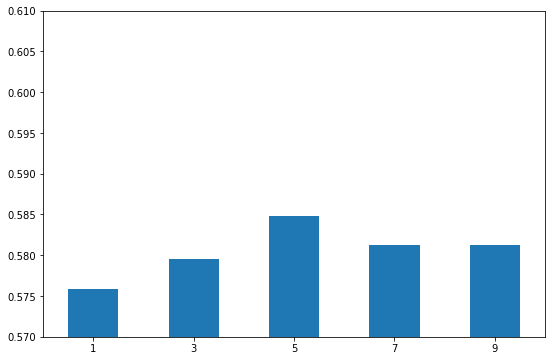

In [25]:
knn_scores = dict()

for k in range(1,10,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, all_X, all_y, cv = 10)
    accuracy_knn = scores.mean()
    knn_scores[k] = accuracy_knn

plot_dict(knn_scores)

In [26]:
knn_scores

{1: 0.5758614683677024,
 3: 0.5795342845613417,
 5: 0.5847900090018314,
 7: 0.5812437702842992,
 9: 0.5812441151820543}

The K-neighbors algorithm doesn't seems to achieve good results.

Let's drop the stopwords in English from the columns so that our algorithm become more efficient.

In [27]:
import nltk
from nltk.corpus import stopwords

stops = list(set(stopwords.words('english')))
print(stops)

['over', 'having', 'not', 'o', 'as', 'wasn', 'her', "it's", 'and', 'if', 'of', 'then', "you'd", 'wouldn', 'its', 'doing', 'me', 'there', 'below', 'down', 'll', 'such', 'to', "weren't", 'being', 'haven', 'does', 'from', "shouldn't", 'some', 'while', 'yourself', 'did', 'after', 'which', "wasn't", 's', "needn't", 'other', 'hadn', 'my', 'y', 'needn', 'who', 'he', "that'll", 'ourselves', 'his', 've', 'aren', 'ain', "couldn't", 'a', 'both', 'yours', 'can', 'it', "wouldn't", 'that', 'most', 'all', 'any', "you're", 'same', 'between', 'in', 'hasn', 'own', 'at', 'we', 'an', 'itself', 'once', 'only', 'more', 'this', 'have', 'won', 'on', "hasn't", 'why', 'shan', 'didn', 'him', 'doesn', "aren't", 'ours', 'mustn', "she's", 'through', 'few', "doesn't", 'mightn', 'further', 'but', "won't", 'yourselves', "haven't", 'before', 'isn', 'don', 'hers', 're', 'what', 'very', 'theirs', 'just', "hadn't", 'i', 'themselves', 'until', 'when', 'where', 'out', 'again', "you've", 'the', 'these', 'above', 'will', 'bee

In [28]:
useful_words2 = []
for word in useful_words:
    if word not in stops:
        useful_words2.append(word)

print(len(useful_words), len(useful_words2))

6995 6850


We got rid of 145 words.

In [29]:
all_X3 = training_words[useful_words2]
all_y3 = training_words['target_']


train_X3, test_X3, train_y3, test_y3 = train_test_split(
    all_X3, all_y3, test_size=0.2,random_state=0)

In [30]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(train_X3, train_y3)
predictions = lr.predict(test_X3)
accuracy = accuracy_score(test_y3, predictions)
print(accuracy)

0.8049901510177282


We lost 0.5 % accuracy by removing the stop words.

After those few tests, we have decided to keep all the words that were judged "useless".

With this in mind, the algorithm was applied to the holdout dataset and the predictions submitted to Kaggle. They have got us a score of 0.79773 out of 1. Excluding the perfect scores of the leaderboard that were obtained because the answers are available online, the best scores goes around 0.85.